In [52]:
import requests
import gpxpy
import polyline

import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [53]:
def get_gpx_df(gpx_file):
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)

    data = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                data.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                })

    df = pd.DataFrame(data)
    return df

In [59]:
def get_route(points):
    params = {
        'geometries': 'polyline6',
    }
    response = requests.get(f"http://127.0.0.1:6000/route/v1/foot/{points}", params=params)
    response.raise_for_status()
    routes = response.json()
    return polyline.decode(routes['routes'][0]['geometry'], 6)

In [60]:
def get_nearest(coords):
    lat, lon = coords
    response = requests.get(f"http://127.0.0.1:6000/nearest/v1/foot/{lon},{lat}")
    response.raise_for_status()
    waypoints = response.json()
    location = waypoints['waypoints'][0]['location']
    return f"{location[0]},{location[1]}"

In [61]:
def plot_gpx(df):
    plt.figure(figsize=(10, 10))
    plt.plot(df['longitude'], df['latitude'], color='red', label='Route')
    ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    plt.legend()
    plt.xticks([], [])
    plt.yticks([], [])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.show()

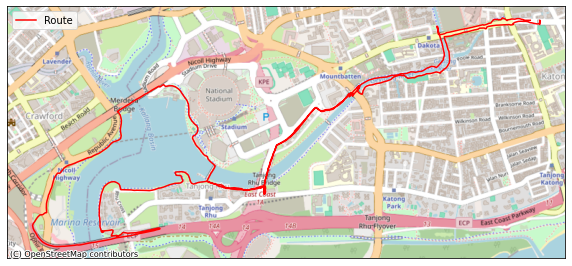

In [62]:
df = get_gpx_df('../data/garmin.gpx')
plot_gpx(df)

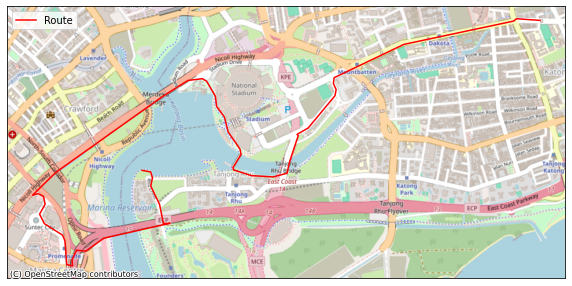

In [63]:
points = [
    (1.3096866602612316, 103.89625728638073),
    (1.299111881286301, 103.87764857291309),
    (1.3040597321741347, 103.8683347030928),
    (1.2983469558278828, 103.86037579488651),
    (1.2985271374368674, 103.86673290442958),
]

route_points = ';'.join(map(get_nearest, points))

route = get_route(route_points)
osrm_df = pd.DataFrame(route, columns=['latitude', 'longitude'])

plot_gpx(osrm_df)